<a href="https://colab.research.google.com/github/ILMNX/pattern-recognition/blob/main/spectral_centroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDENTIFIKASI JENIS SUARA MENGGUNAKAN SPECTRAL CENTROID

add 2 file .mp3 (menggunakan def mp3_to_wav) atau .m4a menggunakan (def m4a_to_wav) sesuai kebutuhan

In [9]:
pip install pydub

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

In [11]:
#konversi mp3 to wav
def mp3_to_wav(audio_file, output_file):
    sound = AudioSegment.from_mp3(audio_file)
    sound.export(output_file, format="wav")

In [12]:
def m4a_to_wav(audio_file, output_file):
    try:
        sound = AudioSegment.from_file(audio_file, format="m4a") # Load M4A file
        sound.export(output_file, format="wav") # Export as WAV
    except Exception as e:
        print(f"Error converting {audio_file}: {e}")

In [13]:
#load audio dan count spectral centroid
def compute_spectral_centroid(audio_path):
  #load audio file
  y, sr = librosa.load(audio_path, sr=None)
  #hitung spectral centroid
  compute_spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
  return compute_spectral_centroid


In [14]:
#Audio Bicara
input_file_bicara = "audio_bicara.mp3"
output_file_bicara = "audio_bicara.wav"
mp3_to_wav(input_file_bicara, output_file_bicara)

In [15]:
#Audio Musik
input_file_musik = "audio_musik.m4a"
output_file_musik = "audio_musik.wav"
m4a_to_wav(input_file_musik, output_file_musik)

In [16]:
# Hitung SC kedua audio
spectral_centroid_bicara = compute_spectral_centroid(output_file_bicara)
spectral_centroid_musik = compute_spectral_centroid(output_file_musik)

In [42]:
plt.figure(figsize=(20, 6)) #visualisasi SC Bicara dan Musik

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

Rata-rata Spectral Centroid Bicara:  2291.7896191132745


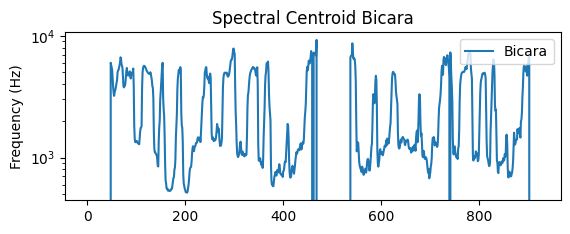

In [45]:
#plot untuk audio bicara
plt.subplot(2,1,1)
plt.semilogy(spectral_centroid_bicara.T, label='Bicara')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid Bicara')
plt.legend(loc='upper right')
avg_spectral_centroid_bicara = np.mean(spectral_centroid_bicara)
print("Rata-rata Spectral Centroid Bicara: ", avg_spectral_centroid_bicara)


Rata-rata Spectral Centroid Musik:  3016.4781034677353


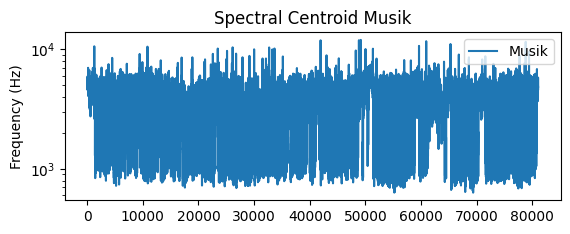

In [46]:
#plot untuk audio musik
plt.subplot(2,1,2)
plt.semilogy(spectral_centroid_musik.T, label='Musik')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid Musik')
plt.legend(loc='upper right')
avg_spectral_centroid_musik = np.mean(spectral_centroid_musik)
print("Rata-rata Spectral Centroid Musik: ", avg_spectral_centroid_musik)


In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [47]:
if avg_spectral_centroid_bicara > avg_spectral_centroid_musik:
  print("Audio Bicara memiliki rata-rata Spectral Centroid lebih tinggi.",avg_spectral_centroid_bicara)
else:
  print("Audio Musik memiliki rata-rata Spectral Centroid lebih tinggi yaitu: \n ",avg_spectral_centroid_musik)

Audio Musik memiliki rata-rata Spectral Centroid lebih tinggi yaitu: 
  3016.4781034677353
